<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
  6.1 [**Handling missing Data**](#Section61)<br>
  6.2 [**Handling redundant Data**](#Section62)<br>
  6.3 [**Handling inconsistent data and outliers**](#Section63)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
  8.1 [**Overall statistics across all seasons**](#Section81)<br>
    8.1.1 [**Winners across all Seasons (By Matches)**](#Section811)<br>
    8.1.2 [**Top Cities that have hosted IPL Matches**](#Section812)<br>
    8.1.3 [**Top 10 venues that has hosted most IPL matches**](#Section813)<br>
  8.2. [**Match Level Analysis**](#Section82)<br>
    8.2.1 [**Matches won Batting 1st**](#Section821)<br>
    8.2.2 [**Matches won Batting 2nd**](#Section822)<br>
    8.2.3 [**Winning percent team and inning wise**](#Section823)<br>
  8.3. [**Player Level Analysis**](#Section83)<br>
    8.3.1 [**Batting**](#Section831)<br>
      8.3.1.1 [**Top 10 Batsman**](#Section8311)<br>
      8.3.1.2 [**Most number of Man/Player Of the Matches (Top 10)**](#Section8312)<br>
      8.3.1.3 [**Best Batting Performance in a Match**](#Section8313)<br>
    8.3.2 [**Bowling**](#Section832)<br>
      8.3.2.1 [**Top 10 Bowlers**](#Section8321)<br>
    8.3.3 [**Fielding**](#Section833)<br>
      8.3.3.1 [**Top 10 Fielders**](#Section8331)<br>
    8.3.4 [**All Rounders**](#Section834)<br>
      8.3.4.1 [**Best All Round performance**](#Section8341)<br>
9. [**Summarization**](#Section9)<br>
  9.1 [**Conclusion**](#Section91)<br>
  9.2 [**Actionable Insights**](#Section92)<br>

---


---
<a name = Section1></a>
# **1. Introduction**
---

- The [Indian Premier League](https://en.wikipedia.org/wiki/Indian_Premier_League "Indian Premier League") (IPL) is a domestic, annual Twenty20 cricket tournament in India organized by the IPL Governing Council under the aegis of the Board of Control for Cricket in India (BCCI). It is the most watched Twenty20 tournament and the second-best paying sporting league globally. 
IPL was established in 2008 and currently consists of eight teams in eight cities across India. The inaugural IPL season was won by Rajasthan Royals. As of November 2020, there have been thirteen seasons of the IPL tournament. The latest season was conducted from October to November 2020, with Mumbai Indians  winning the title. 


- In this project I have analysed the data of IPL matches from 2008 to 2020 (upto date) to gather insights. 
- The data has been collected from [Kaggle](https://www.kaggle.com/) website and uploaded on my GITHUB repository.


- **Datasets**
	- Matches = https://raw.githubusercontent.com/sayed-sajjad/IPL/main/assets/data/matches.csv
	- Deliveries = https://raw.githubusercontent.com/sayed-sajjad/IPL/main/assets/data/deliveries.csv 


![Alt text](https://raw.githubusercontent.com/sayed-sajjad/IPL/main/assets/images/IPL-LOGO.jpg)



---
<a name = Section2></a>
# **2. Problem Statement**
---


- **Indian Premier League (IPL):**

  - The **Indian Premier League (IPL)** is a professional Twenty20 cricket league in India contested during March or April and May of every year by **eight teams representing eight different cities in India**.
  - The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. 
  - The IPL is the **most-attended cricket league in the world**. 
  - By analysing the players on different aspects like **Batting, Bowling and Fielding**, let us try to find the **value they add to their teams** and thus the role they play in winning the tournament.
  - The Premier League is the most-watched sports league in the world.


![Alt text](https://raw.githubusercontent.com/sayed-sajjad/IPL/main/assets/images/IPL-All-teams-logos.jpg)

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **Installing Libraries**

In [1]:
#Package that is required by pandas profiling
!pip install -q datascience
#Library to generate basic statistics about data.
!pip install -q pandas-profiling                                                                    

<a name = Section32></a>
### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [2]:
#Upgrading pandas profiling to the latest version
!pip install -q --upgrade pandas-profiling 

<a name = Section33></a>
### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.express as px

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

- Before going further you must have a good idea about the features of the data set:

-   This **matches.csv** dataset provides details related to the matches such as  **location, contesting teams, winner, player of the match, umpires, results, etc.**

|Column Name|  Description|
|--|--|
| id | The id of the match |
| season | The year the match was played |
| city | The id of the match |
| date | The id of the match |
| team1 | The id of the match |
| team2 | Team2 of the match |
| toss_winner | The team that won the toss |
| toss_decision | The toss winning team choose to bat or Field |
| result | what is the result type, normal, tie or no result |
| dl_applied | whether the dl applied to find the result |
| winner | winner of the match |
| win_by_runs | the margin of runs the team has won |
| win_by_wickets | with how many wickets remaining the team has won |
| player_of_match | Player of the particular match |
| venue | The venue name where the match was conducted |
| umpire1 | Umpire1 of the match |
| umpire2 | Umpire2 of the match |
| umpire3 | Umpire3 of the match |
	
	
-   This **deliveries.csv** dataset provides the **ball by ball** analysis of **batsman, bowler,  the player that got dismissed,  the no. of runs hit**

| Column Name | Description |
| -- | -- |
| match_id | The id of the match |
| inning | The innings no. 1,2,3 or 4 |
| batting_team | The team that doing batting |
| bowling_team | The team that doing bowling |
| over | The present ongoing over |
| ball | which ball of the over |
| batsman | The batsman who is facing the ball |
| non_striker | The batsman at the non-strikers end |
| bowler | The bowler doing bowling |
| is_super_over | Is it a super over or not |
| wide_runs | wide runs given by the bowler |
| bye_runs | bye runs given by the bowler |
| legbye_runs | legbye runs given by the bowler |
| noball_runs | noball runs given by the bowler |
| penalty_runs | penalty runs given to the batting team |
| batsman_runs | the runs hit by batsman |
| extra_runs | the extra runs given by the bowler |
| total_runs | total runs conceded by bowler in that particular delivery |
| player_dismissed | The player that got dismissed during that particular delivery |
| dismissal_kind | what is the way the batsman got out |
| fielder | the fielder involved in that particular delivery |




In [4]:
matches_df  = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/sayed-sajjad/IPL/main/assets/data/matches.csv')
print('Data Shape:', matches_df.shape)
matches_df.head()

Data Shape: (816, 18)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,62,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,63,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,64,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [5]:
deliveries_df = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/sayed-sajjad/IPL/main/assets/data/deliveries.csv')
print('Data Shape:', deliveries_df.shape)
deliveries_df.head()

Data Shape: (193404, 21)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### **Data Description**

- To get some quick description out of the data you can use describe method defined in pandas library.

In [6]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,8.160000e+02,816.000000,816.000000,816.000000,816.000000
mean,9.121164e+04,2013.926471,0.023284,13.609069,3.351716
std,3.176228e+05,3.665054,0.150898,23.721138,3.410568
min,1.000000e+00,2008.000000,0.000000,0.000000,0.000000
25%,2.047500e+02,2011.000000,0.000000,0.000000,0.000000
50%,4.085000e+02,2014.000000,0.000000,0.000000,3.500000
75%,6.122500e+02,2017.000000,0.000000,19.000000,6.000000
max,1.237181e+06,2020.000000,1.000000,146.000000,10.000000


In [7]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,1.934040e+05,193404.000000,193404.000000,193404.000000,193404.000000,193404.000000,193404.000000,193404.000000,193404.000000,193404.000000,193404.000000,193404.000000,193404.000000
mean,9.188447e+04,1.483160,10.165038,3.615639,0.000646,0.036488,0.004767,0.020796,0.004545,0.000052,1.251375,0.066648,1.318023
std,3.185129e+05,0.501906,5.678813,1.807174,0.025415,0.247399,0.114049,0.193646,0.085233,0.016079,1.609801,0.341620,1.606059
min,1.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.050000e+02,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.080000e+02,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,6.130000e+02,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.237181e+06,5.000000,20.000000,10.000000,1.000000,5.000000,4.000000,5.000000,7.000000,5.000000,7.000000,7.000000,10.000000


### **Data Information**

In [8]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               816 non-null    int64 
 1   season           816 non-null    int64 
 2   city             809 non-null    object
 3   date             816 non-null    object
 4   team1            816 non-null    object
 5   team2            816 non-null    object
 6   toss_winner      816 non-null    object
 7   toss_decision    816 non-null    object
 8   result           816 non-null    object
 9   dl_applied       816 non-null    int64 
 10  winner           812 non-null    object
 11  win_by_runs      816 non-null    int64 
 12  win_by_wickets   816 non-null    int64 
 13  player_of_match  812 non-null    object
 14  venue            816 non-null    object
 15  umpire1          814 non-null    object
 16  umpire2          814 non-null    object
 17  umpire3          179 non-null    ob

In [9]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193404 entries, 0 to 193403
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          193404 non-null  int64 
 1   inning            193404 non-null  int64 
 2   batting_team      193404 non-null  object
 3   bowling_team      193404 non-null  object
 4   over              193404 non-null  int64 
 5   ball              193404 non-null  int64 
 6   batsman           193404 non-null  object
 7   non_striker       193398 non-null  object
 8   bowler            193404 non-null  object
 9   is_super_over     193404 non-null  int64 
 10  wide_runs         193404 non-null  int64 
 11  bye_runs          193404 non-null  int64 
 12  legbye_runs       193404 non-null  int64 
 13  noball_runs       193404 non-null  int64 
 14  penalty_runs      193404 non-null  int64 
 15  batsman_runs      193404 non-null  int64 
 16  extra_runs        193404 non-null  int

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [10]:
# Generate Profiling Report for Matches DataFrame. 
profile_Matches = ProfileReport(matches_df, title='Pandas Profiling Report - Matches', explorative=True)
profile_Matches.to_file("IPL_EDA_Profiling_Report_Matches.html")

# Generate Profiling Report for Deliveries DataFrame. 
profile_Deliveries = ProfileReport(deliveries_df, title='Pandas Profiling Report - Deliveries', explorative=True)
profile_Deliveries.to_file("IPL_EDA_Profiling_Report_Deliveries.html")

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- Lets perform data manipulation over unstructured data for further processing and analysis.

- To attain a structured data, we will need to verify and manipulate the integrity of the data by:
  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

<a name = Section61></a>
### **Handling missing Data**

- So there are total 816 matches played with 812 decided winners. Let us see which rows do not have any decided winner.

In [11]:
matches_df[matches_df.isna()['winner']]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
241,301,2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
486,546,2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
511,571,2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


**Observation**: These matches were probably washed from the rains and did not have any results declared. Lets update the null values for these matches (columns: winner, player_of_match) to **Undeclared** 

In [12]:
matches_df["winner"] = matches_df["winner"].fillna('Undeclared')
matches_df["player_of_match"] = matches_df["player_of_match"].fillna('Undeclared')

In [13]:
matches_df[matches_df["city"].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
402,462,2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
403,463,2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
407,467,2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
409,469,2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
410,470,2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
415,475,2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
417,477,2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [14]:
matches_df["city"] = matches_df["city"].fillna('Dubai') #For all matches in Dubai International Cricket Stadium, city is marked as NaN. So let's replace it with Dubai

<a name = Section62></a>
### **Handling redundant Data**

- Dropping umpire information as it is not essential for our analysis

In [15]:
matches_df.drop(columns=['umpire1', 'umpire2', 'umpire3'], inplace= True)

<a name = Section63></a>
### **Handling inconsistent data and outliers**

- Lets check the Duplicate Values for columns (in team1, team2, city, venue  ) and replace them (if any)

In [16]:
matches_df['team1'].value_counts().to_frame()

,team1
Mumbai Indians,101
Kings XI Punjab,91
Chennai Super Kings,89
Royal Challengers Bangalore,85
Kolkata Knight Riders,83
Delhi Daredevils,72
Rajasthan Royals,67
Sunrisers Hyderabad,63
Deccan Chargers,43
Pune Warriors,20


In [17]:
matches_df["team1"].replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches_df["team2"].replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches_df["winner"].replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches_df['team1'].value_counts().to_frame()

,team1
Mumbai Indians,101
Kings XI Punjab,91
Chennai Super Kings,89
Royal Challengers Bangalore,85
Kolkata Knight Riders,83
Delhi Daredevils,72
Rajasthan Royals,67
Sunrisers Hyderabad,63
Deccan Chargers,43
Pune Warriors,20


In [18]:
matches_df['city'].value_counts().to_frame()

,city
Mumbai,101
Kolkata,77
Delhi,74
Bangalore,66
Hyderabad,64
Chennai,57
Jaipur,47
Chandigarh,46
Pune,38
Abu Dhabi,29


In [19]:
matches_df["city"].replace({'Dubai \\(DSC\\)':'Dubai'}, regex=True, inplace=True)
matches_df["city"].replace({'Bengaluru':'Bangalore'}, regex=True, inplace=True)
matches_df['city'].value_counts().to_frame()

,city
Mumbai,101
Bangalore,80
Kolkata,77
Delhi,74
Hyderabad,64
Chennai,57
Jaipur,47
Chandigarh,46
Pune,38
Dubai,33


In [20]:
matches_df['venue'].value_counts().to_frame()

,venue
Eden Gardens,77
Wankhede Stadium,73
M Chinnaswamy Stadium,73
Feroz Shah Kotla,67
"Rajiv Gandhi International Stadium, Uppal",56
"MA Chidambaram Stadium, Chepauk",49
Sawai Mansingh Stadium,47
"Punjab Cricket Association Stadium, Mohali",35
Dubai International Cricket Stadium,33
"Sheikh Zayed Stadium, Abu Dhabi",22


In [21]:
matches_df.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium',},regex=True,inplace=True)

matches_df['venue'].value_counts().to_frame()

,venue
M. Chinnaswamy Stadium,80
Eden Gardens,77
Feroz Shah Kotla,74
Wankhede Stadium,73
Rajiv Gandhi International Stadium,64
M.A. Chidambaram Stadium,57
Punjab Cricket Association Stadium,56
Sawai Mansingh Stadium,47
Dubai International Cricket Stadium,33
"Sheikh Zayed Stadium, Abu Dhabi",22


- Replace Team Names with their respective Abbreviations so that its easier to plot charts

In [22]:
teams = ['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Delhi Capitals','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
team_abbrevations = ['MI','KKR','RCB','DCR','CSK','RR','DC','DC','GL','KXIP','SRH','RPS','KTK','PW','RPS']

matches_df.replace(teams,team_abbrevations,inplace=True)
deliveries_df.replace(teams,team_abbrevations,inplace=True)

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.

- You may end up observing some new changes, so keep it under check and make right observations.

In [23]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               816 non-null    int64 
 1   season           816 non-null    int64 
 2   city             816 non-null    object
 3   date             816 non-null    object
 4   team1            816 non-null    object
 5   team2            816 non-null    object
 6   toss_winner      816 non-null    object
 7   toss_decision    816 non-null    object
 8   result           816 non-null    object
 9   dl_applied       816 non-null    int64 
 10  winner           816 non-null    object
 11  win_by_runs      816 non-null    int64 
 12  win_by_wickets   816 non-null    int64 
 13  player_of_match  816 non-null    object
 14  venue            816 non-null    object
dtypes: int64(5), object(10)
memory usage: 95.8+ KB


In [24]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,60,2008,Bangalore,18-04-2008,KKR,RCB,RCB,field,normal,0,KKR,140,0,BB McCullum,M. Chinnaswamy Stadium
1,61,2008,Chandigarh,19-04-2008,CSK,KXIP,CSK,bat,normal,0,CSK,33,0,MEK Hussey,Punjab Cricket Association Stadium
2,62,2008,Delhi,19-04-2008,RR,DC,RR,bat,normal,0,DC,0,9,MF Maharoof,Feroz Shah Kotla
3,63,2008,Mumbai,20-04-2008,MI,RCB,MI,bat,normal,0,RCB,0,5,MV Boucher,Wankhede Stadium
4,64,2008,Kolkata,20-04-2008,DCR,KKR,DCR,bat,normal,0,KKR,0,5,DJ Hussey,Eden Gardens


In [25]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193404 entries, 0 to 193403
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          193404 non-null  int64 
 1   inning            193404 non-null  int64 
 2   batting_team      193404 non-null  object
 3   bowling_team      193404 non-null  object
 4   over              193404 non-null  int64 
 5   ball              193404 non-null  int64 
 6   batsman           193404 non-null  object
 7   non_striker       193398 non-null  object
 8   bowler            193404 non-null  object
 9   is_super_over     193404 non-null  int64 
 10  wide_runs         193404 non-null  int64 
 11  bye_runs          193404 non-null  int64 
 12  legbye_runs       193404 non-null  int64 
 13  noball_runs       193404 non-null  int64 
 14  penalty_runs      193404 non-null  int64 
 15  batsman_runs      193404 non-null  int64 
 16  extra_runs        193404 non-null  int

In [26]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


<a name = Section8></a>
# **8. Exploratory Data Analysis**

<a name = Section81></a>
### **Overall statistics across all seasons** 

<a name = Section811></a>
#### Winners across all Seasons (By Matches) 

Tournament Winners across all seasons: 
   team  winner
0   MI       5
1  CSK       3
2  KKR       2
3  SRH       1
4  DCR       1
5   RR       1


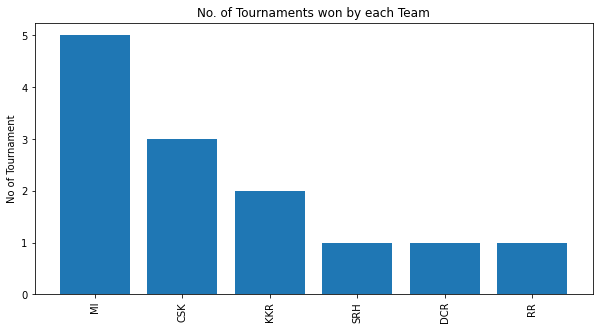

In [27]:
season_winner=matches_df.drop_duplicates(subset=['season'], keep='last')[['season','winner']].reset_index(drop=True)
season_winner = season_winner['winner'].value_counts()

season_winner = season_winner.to_frame()
season_winner.reset_index(inplace=True)
season_winner.rename(columns={'index':'team'},inplace=True)
print ("Tournament Winners across all seasons: \n",season_winner)

plt.figure(figsize = (10,5))
plt.bar(season_winner["team"], season_winner['winner'])
plt.ylabel("No of Tournament")
plt.title("No. of Tournaments won by each Team")
plt.xticks(rotation=90)
plt.show()

**Observation**. The Mumbai Indians are a franchise cricket team based in Mumbai, Maharashtra and has won the most number of matches in the history of IPL from 2008-2020, making it the most successful franchise amongst its competitors. 

![Alt Text](https://raw.githubusercontent.com/sayed-sajjad/IPL/main/assets/images/Mumbai_Indians_Logo.png)


It is the only Team in IPL that has won the Tournament 5 times (2013, 2015, 2017, 2019 and 2020). 

<a name = Section812></a>
#### Top Cities that have hosted IPL Matches

Top 10 Cities that have hosted IPL Matches:
           city  Match Counts
23      Mumbai           101
2    Bangalore            80
21     Kolkata            77
9        Delhi            74
14   Hyderabad            64
7      Chennai            57
16      Jaipur            47
6   Chandigarh            46
26        Pune            38
11       Dubai            33


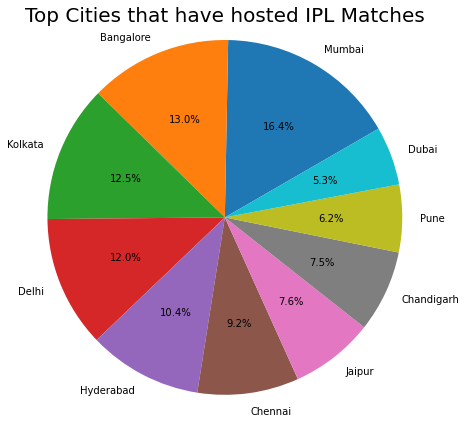

In [28]:
city_counts=matches_df.groupby('city').apply(lambda x:x['city'].count()).reset_index(name='Match Counts')
top_cities_order=city_counts.sort_values(by='Match Counts',ascending=False)
top_cities=top_cities_order[:10]
print('Top 10 Cities that have hosted IPL Matches:\n',top_cities)

plt.figure(figsize=(7,7))
plt.pie(top_cities['Match Counts'],labels=top_cities['city'],autopct='%1.1f%%', startangle=30)
plt.axis('equal')
plt.title('Top Cities that have hosted IPL Matches',size=20)
plt.show()

**Observation**. Mumbai is only city in Maharastra, India, that hosted most number of IPL cricket matches till date.

![Alt Text](https://raw.githubusercontent.com/sayed-sajjad/IPL/main/assets/images/Mumbai_skyline.jpg)

**In Picture**. Mumbai Skyline

#### Top 10 venues that has hosted most IPL matches 

Top Stadiums that have hosted IPL Matches:
                                   venue  Match Counts
15               M. Chinnaswamy Stadium            80
8                          Eden Gardens            77
9                      Feroz Shah Kotla            74
35                     Wankhede Stadium            73
23   Rajiv Gandhi International Stadium            64
16             M.A. Chidambaram Stadium            57
22   Punjab Cricket Association Stadium            56
26               Sawai Mansingh Stadium            47
7   Dubai International Cricket Stadium            33
30      Sheikh Zayed Stadium, Abu Dhabi            22


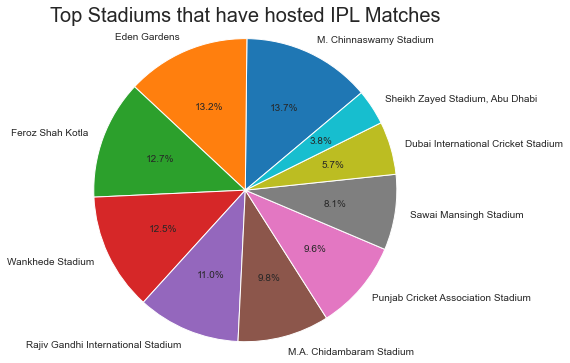

In [49]:
venue_counts=matches_df.groupby('venue').apply(lambda x:x['venue'].count()).reset_index(name='Match Counts')
top_venues_order=venue_counts.sort_values(by='Match Counts',ascending=False)
top_venues=top_venues_order[:10]
print('Top Stadiums that have hosted IPL Matches:\n',top_venues)
top_venues
plt.figure(figsize=(6,6))
plt.pie(top_venues['Match Counts'],labels=top_venues['venue'],autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.title('Top Stadiums that have hosted IPL Matches',size=20)
plt.show()

**Observation** The M. Chinnaswamy Stadium is a cricket stadium located in Bangalore, Karnataka and has also been a Home ground for the Royal Challengers Bangalore team in IPL from 2008 - to date and it has hosted the most number of IPL matches. 

![Alt Text](https://raw.githubusercontent.com/sayed-sajjad/IPL/main/assets/images/chinnaswamy_650_040615105253.jpg)

**In Picture** M. Chinnaswamy Stadium

<a name = Section82></a>
### Match Level Analysis

In [30]:
matches_df['result'].value_counts()

normal       799
tie           13
no result      4
Name: result, dtype: int64

In [31]:
# Finding number of toss wins for each teams
matches_df['toss_winner'].value_counts()

MI      106
DC      100
KKR      98
CSK      97
RCB      87
RR       87
KXIP     85
SRH      57
DCR      43
PW       20
GL       15
RPS      13
KTK       8
Name: toss_winner, dtype: int64

<a name = Section821></a>
#### Matches won Batting 1st

In [32]:
# Find batting first and won the match

batting_first = matches_df[matches_df['win_by_runs'] != 0]
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,60,2008,Bangalore,18-04-2008,KKR,RCB,RCB,field,normal,0,KKR,140,0,BB McCullum,M. Chinnaswamy Stadium
1,61,2008,Chandigarh,19-04-2008,CSK,KXIP,CSK,bat,normal,0,CSK,33,0,MEK Hussey,Punjab Cricket Association Stadium
7,67,2008,Chennai,23-04-2008,CSK,MI,MI,field,normal,0,CSK,6,0,ML Hayden,M.A. Chidambaram Stadium
9,69,2008,Chandigarh,25-04-2008,KXIP,MI,MI,field,normal,0,KXIP,66,0,KC Sangakkara,Punjab Cricket Association Stadium
14,74,2008,Bangalore,28-04-2008,CSK,RCB,CSK,bat,normal,0,CSK,13,0,MS Dhoni,M. Chinnaswamy Stadium


Teams won Batting First
 MI      62
CSK     53
KKR     41
KXIP    40
RCB     38
SRH     34
DC      34
RR      28
DCR     18
RPS      7
PW       6
KTK      2
GL       1
Name: winner, dtype: int64


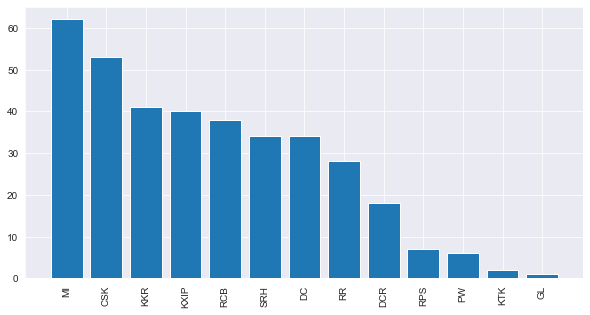

In [55]:
print ("Teams won Batting First\n",batting_first['winner'].value_counts())
plt.figure(figsize = (10,5))
plt.bar(list(batting_first['winner'].value_counts().keys()), batting_first['winner'].value_counts())
plt.xticks(rotation=90)
plt.show()

**Observation** Mumbai Indians has the highest number of wins under their belt when they bat first. No wonder whenever they win the toss they like to bat first.  

<a name = Section822></a>
#### Matches won Batting 2nd

In [35]:
# Find teams has won after batting second

batting_second = matches_df[matches_df['win_by_wickets'] != 0]
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
2,62,2008,Delhi,19-04-2008,RR,DC,RR,bat,normal,0,DC,0,9,MF Maharoof,Feroz Shah Kotla
3,63,2008,Mumbai,20-04-2008,MI,RCB,MI,bat,normal,0,RCB,0,5,MV Boucher,Wankhede Stadium
4,64,2008,Kolkata,20-04-2008,DCR,KKR,DCR,bat,normal,0,KKR,0,5,DJ Hussey,Eden Gardens
5,65,2008,Jaipur,21-04-2008,KXIP,RR,KXIP,bat,normal,0,RR,0,6,SR Watson,Sawai Mansingh Stadium
6,66,2008,Hyderabad,22-04-2008,DCR,DC,DCR,bat,normal,0,DC,0,9,V Sehwag,Rajiv Gandhi International Stadium


Matches won by teams batting 2nd
 KKR     57
MI      56
CSK     53
RCB     51
RR      51
DC      50
KXIP    45
SRH     31
GL      12
DCR     11
RPS      8
PW       6
KTK      4
Name: winner, dtype: int64


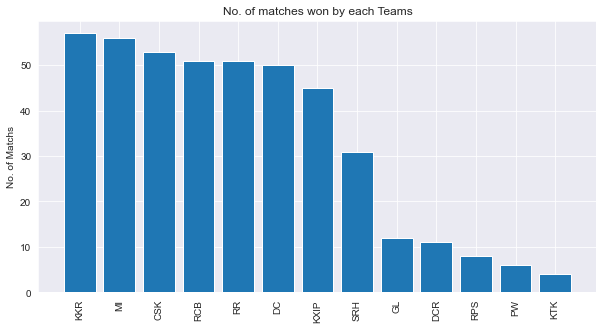

In [56]:
print ("Matches won by teams batting 2nd\n", batting_second['winner'].value_counts())
plt.figure(figsize = (10,5))
plt.bar(list(batting_second['winner'].value_counts().keys()), batting_second['winner'].value_counts())
plt.ylabel("No. of Matchs")
plt.title("No. of matches won by each Teams")
plt.xticks(rotation=90)
plt.show()

**Observation** Kolkatta KNight riders is the Tema which has won more number of matches whenever they have chased, proving that they are better chasers than any other teams, Mumbai Indians follows closely  

<a name = Section823></a>
#### Winning percent team and inning wise

In [38]:
# Grouping the wins for teams batting first and second
temp = matches_df.groupby(by=['winner','team1']).count()['id'].reset_index().query('winner==team1')[['winner','id']]
temp2 = matches_df.groupby(by=['winner','team2']).count()['id'].reset_index().query('winner==team2')[['winner','id']]
temp3= pd.DataFrame([matches_df.team1.value_counts(),matches_df.team2.value_counts()],).transpose().reset_index()

team_stat= pd.merge(temp, temp2, on='winner', how='inner')
team_stat= pd.merge(team_stat, temp3, left_on='winner',right_on='index', how='inner')

team_stat.rename(columns={'id_x':'batting_first','id_y':'batting_second'}, inplace= True)
team_stat.drop(columns=['index'], inplace= True)

In [39]:
# finding win percent inning wise
team_stat['win_percent_first']= 100*(team_stat['batting_first']/ team_stat['team1'])
team_stat['win_percent_second']= 100*(team_stat['batting_second']/ team_stat['team2'])

In [40]:
# Aggregating the win percent
team_stat['win_percent']=100*(team_stat.batting_first+ team_stat.batting_second)/ (team_stat.team1+ team_stat.team2)

In [41]:
# Sorting the values
team_stat.sort_values(by='win_percent', inplace=True, ascending=False)

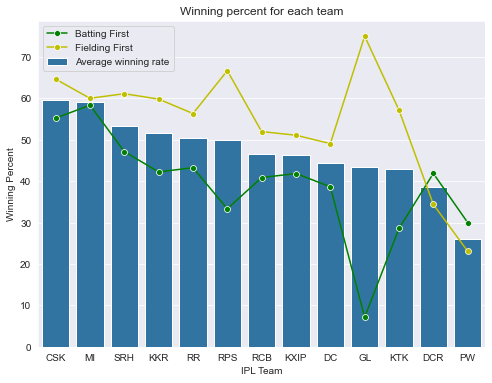

In [42]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')

sns.lineplot(x= 'winner', y= 'win_percent_first',data=team_stat, color='g',label='Batting First', sort= False, marker='o' )
sns.lineplot(x= 'winner', y= 'win_percent_second', data=team_stat, color='y', label= 'Fielding First',sort=False,marker='o')
sns.barplot(x='winner', y= 'win_percent',data=team_stat,  color='tab:blue', label='Average winning rate')

#plt.xticks(rotation=90)
plt.xlabel('IPL Team')
plt.ylabel('Winning Percent')
plt.title('Winning percent for each team')
plt.legend()
plt.show()

**Observation** CSK has one of the highest win percents in the IPL games winning about 59% of its games. However, it has a slightly better chasing record (65%) than a batting first record (57% wins). Interstingly, all the teams have a better chasing record than batting first record (chasing team wins 55% matches).

This difference is most prominent in Kolkata Knight Riders who have a win percent of 61% chasing but only 41% batting first. Similary, Rajasthan Royals also have a large gap between the chasing (57.5%) and batting first (43%) win percents. Mumbai Indians has almost similar winning percent for both batting and fielding first (57% and 59% respectively).

<a name = Section83></a>
### Player Level Analysis

<a name = Section831></a>
#### Batting

<a name = Section8311></a>
##### Top 10 Batsman

The Top 10 Batsmen in thr Tournament are:
             batsman  Runs
515         V Kohli  5907
451        SK Raina  5415
120       DA Warner  5333
389       RG Sharma  5251
415        S Dhawan  5247
96         CH Gayle  4876
26   AB de Villiers  4871
305        MS Dhoni  4677
406      RV Uthappa  4638
156       G Gambhir  4223


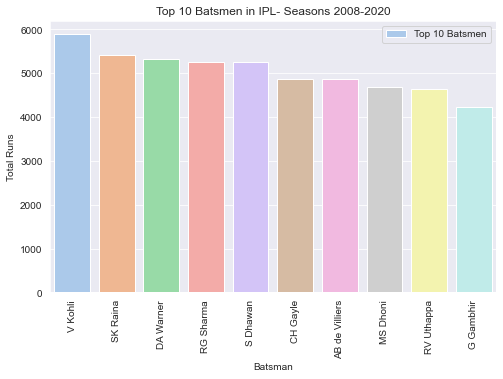

In [43]:
batting_totalruns=deliveries_df.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting_totalruns.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10] 
print('The Top 10 Batsmen in thr Tournament are:\n',top_batsmen)
plt.figure(figsize=(8,5))
#Spectral
sns.barplot(x='batsman', y= 'Runs',data=top_batsmen, palette='pastel', label='Top 10 Batsmen')

plt.xticks(rotation=90)
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.title('Top 10 Batsmen in IPL- Seasons 2008-2020')
plt.legend()
plt.show()

**Observation** Virat Kohli is the Top Player in the list who has scored the most number of runs in IPL, closely followed by the retired Suresh Raina.

![Alt Text](https://raw.githubusercontent.com/sayed-sajjad/IPL/main/assets/images/Virat_Kohli.jpg)

**In Picture** Virat Kohli. Highest run Scorer in IPL history till date.

<a name = Section8312></a>
##### Most number of Man/Player Of the Matches (Top 10)

Most Number of player of Match:
 AB de Villiers    23
CH Gayle          22
RG Sharma         18
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         16
SK Raina          14
G Gambhir         13
V Kohli           13
Name: player_of_match, dtype: int64


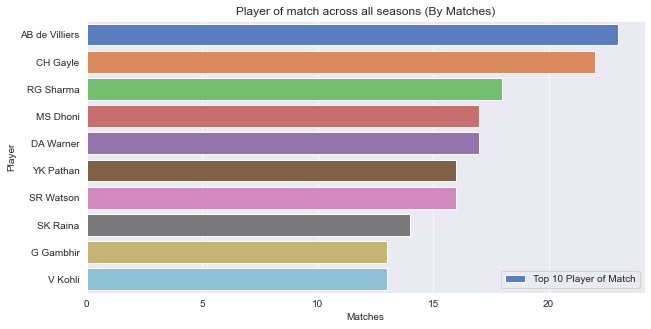

In [44]:
fig=plt.figure(figsize=(10, 5))

axes = sns.countplot(y="player_of_match", data=matches_df, 
                     order=matches_df["player_of_match"].value_counts()[:10].sort_values(ascending = False).index,
                    palette="muted", label='Top 10 Player of Match', orient = "h")
print('Most Number of player of Match:\n',matches_df["player_of_match"].value_counts()[:10].sort_values(ascending = False))
axes.set_title('Player of match across all seasons (By Matches)')
axes.set_xlabel('Matches')
axes.set_ylabel('Player')
axes.legend()

**Observation** AB de Villiers is the Topplayer in the list who has won the most number of Player of the Matches (23) award in IPL till date followed very closely by Chris Gayle (22).

![Alt Text](https://raw.githubusercontent.com/sayed-sajjad/IPL/main/assets/images/ABD.jpg)

**In Picture** AB de Villiers. Most number of _Man Of Matches_ in IPL History till date.

<a name = Section8313></a>
##### Best Batting Performance in a Match

The Top 10 Batting Performances in the IPL History are:
             batsman  Innings Runs  Balls Faced  Strike Rate for Match  inning  \
0          CH Gayle           175           69                 253.62       1   
69      BB McCullum           158           77                 205.19       1   
146  AB de Villiers           133           61                 218.03       1   
207        KL Rahul           132           70                 188.57       1   
277         RR Pant           130           64                 203.12       1   
341  AB de Villiers           129           53                 243.40       1   
394        CH Gayle           128           62                 206.45       1   
456         M Vijay           127           57                 222.81       1   
513       DA Warner           126           60                 210.00       1   
573        V Sehwag           122           62                 196.77       1   

    batting_team bowling_team  
0            RCB   

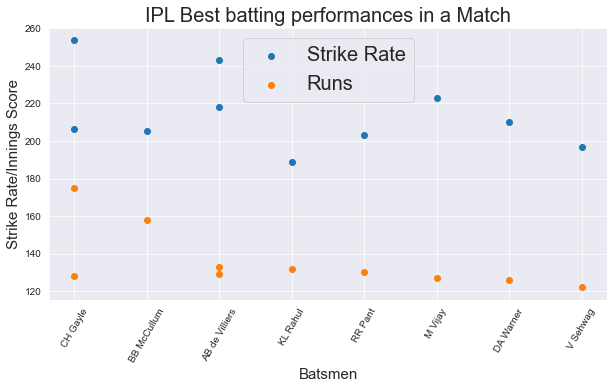

In [45]:
batting_ings=deliveries_df.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
batting_ings_sorted=batting_ings.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores=batting_ings_sorted[:10] 
batsman_ball_faced=deliveries_df.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance=pd.merge(top_batsmen_scores,batsman_ball_faced,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_performance['Strike Rate for Match']=round(batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced'],2)
batsmen_innings=pd.merge(batsmen_performance,deliveries_df,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_innings_req=batsmen_innings.iloc[:,1:8]
batsmen_innings_req_2=batsmen_innings_req.drop_duplicates()

print('The Top 10 Batting Performances in the IPL History are:\n',batsmen_innings_req_2)

x=batsmen_innings_req_2['batsman']
y1=batsmen_innings_req_2['Strike Rate for Match']
y2=batsmen_innings_req_2['Innings Runs']

plt.figure(figsize=(10,5))
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.xlabel('Batsmen',size=15)
plt.ylabel('Strike Rate/Innings Score',size=15)
plt.title('IPL Best batting performances in a Match',size=20)
plt.xticks(rotation=60)
plt.legend(['Strike Rate','Runs'],prop={'size':20})
plt.show()

**Observation** Chris Gayle and AB de Villiers have appeared twice in the Top 10 run scorer list. Both have represented RCB, when they have enlisted their Top 2 scores- which are in the Top 10 list of IPL History- making RCB achieve Top 4 spots out of 10, Followed by Kings XI Punjab with 2 spots.

![Alt text](https://raw.githubusercontent.com/sayed-sajjad/IPL/main/assets/images/ChrisGayle_ABD.jpg)

**In Picture** RCB's Chris Gayle & AB de Villiers. _Highest run scorer_ in a single Match in IPL history till date

<a name = Section832></a>
#### Bowling

<a name = Section8321></a>
##### Top 10 Bowlers

The Top 10 Wicket Takers in IPL History are:
               bowler  Wickets
303       SL Malinga      170
6           A Mishra      156
115  Harbhajan Singh      150
236        PP Chawla      150
87          DJ Bravo      147
49           B Kumar      133
243         R Ashwin      131
309        SP Narine      124
340         UT Yadav      119
255        RA Jadeja      110


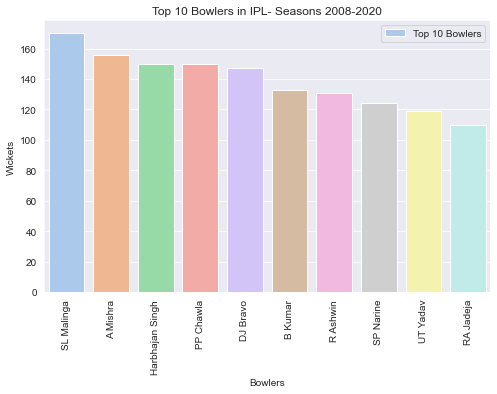

In [46]:
bowling_wickets=deliveries_df[deliveries_df['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 

print('The Top 10 Wicket Takers in IPL History are:\n',top_bowlers)
plt.figure(figsize=(8,5))
#Spectral
sns.barplot(x='bowler', y= 'Wickets',data=top_bowlers, palette='pastel', label='Top 10 Bowlers')

plt.xticks(rotation=90)
plt.xlabel('Bowlers')
plt.ylabel('Wickets')
plt.title('Top 10 Bowlers in IPL- Seasons 2008-2020')
plt.legend()
plt.show()

**Observation** Sri-Lanka's Lasith Malinga who plays for Mumbai Indian takes the top spot as the most successful bowler in the history of IPL between 2008-2018. it will take some time catching him as he is way ahead of his contemporaries. 

![Alt Text](https://raw.githubusercontent.com/sayed-sajjad/IPL/main/assets/images/Lasith-Malinga.jpg)

**In Picture** Lasith Malinga. Highest Wicket taker in IPL History till date.  

<a name = Section833></a>
#### Fielding

<a name = Section8331></a>
##### Top 10 Fielders

The Best Fielders(and WicketKeepers) in the Torunament are:
             fielder  Dismissals
285        MS Dhoni         159
210      KD Karthik         152
380      RV Uthappa         125
20   AB de Villiers         117
420        SK Raina         115
319        PA Patel          97
363       RG Sharma          93
478         V Kohli          90
204      KA Pollard          85
492         WP Saha          84


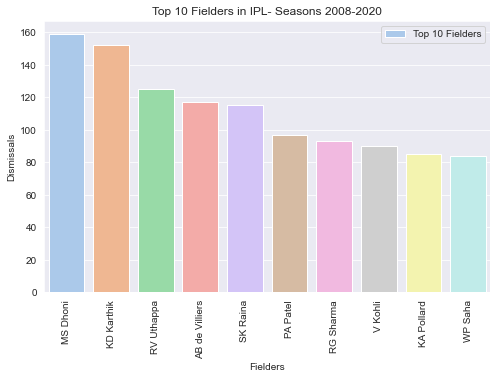

In [47]:
#Creating a list of the best fielders- Considering Catch,Run Out and Stumpings
fielder_list=deliveries_df.groupby('fielder').apply(lambda x:x).dropna().reset_index()
fielder_list_count=fielder_list.groupby('fielder').count()
fielder_list_counts=fielder_list_count['dismissal_kind'].reset_index(name='Dismissals')
fielder_list_max=fielder_list_counts.sort_values(by='Dismissals',ascending=False)
top_fielders=fielder_list_max[0:10]
print('The Best Fielders(and WicketKeepers) in the Torunament are:\n',top_fielders)

plt.figure(figsize=(8,5))
#Spectral
sns.barplot(x='fielder', y= 'Dismissals',data=top_fielders, palette='pastel', label='Top 10 Fielders')

plt.xticks(rotation=90)
plt.xlabel('Fielders')
plt.ylabel('Dismissals')
plt.title('Top 10 Fielders in IPL- Seasons 2008-2020')
plt.legend()
plt.show()

**Observation** Ms Dhoni is the only fielder/Wicketkeeper who has taken more catches than anybody else in the history of IPL. He is in a Cat and mouse chase with D. Karthik who is not far away from him in the number of catches held. 

![Alt Text](https://raw.githubusercontent.com/sayed-sajjad/IPL/main/assets/images/MS_Dhoni.png)

**In Picture** MS Dhoni's airborne catch. 

<a name = Section834></a>
#### All-Rounders

<a name = Section8341></a>
##### Best All Rounder performance - Considering Batting, Bowling and Fielding. 

Cricket is not about a specific department. It also involves a player who can do everything be it Batting, Bowling and Fielding and he is known as an All-Rounder. In any form, No cricket team is complete without a specialized All-Rounder within the playing XI. 

Lets try and create a small Fantasy scoring metrics which will give us an overall contribution of a player from the sum of these points:

**Batting**  = 0.5 (For each Run scored, the overall contribution of the player will be 0.5 points)

**Bowling**  = 15 (For each Wicket Taken, the overall contribution of the player will be 15 points)

**Fielding** = 10 (For each dismissal, the overall contribution of the player will be 10 points)

The sum of all these contributions will be used to calculate the overall score and to rank the best players of the Tournament.

The top 10 best players overall are:
              batsman  Runs  Wickets  Dismissals  Overall Score
234         SK Raina  5415       25       115.0         4232.5
265          V Kohli  5907        4        90.0         3913.5
199        RG Sharma  5251       15        93.0         3780.5
243        SR Watson  3913       92        44.0         3776.5
67          DJ Bravo  1505      147        78.0         3737.5
195        RA Jadeja  2181      110        80.0         3540.5
212         S Dhawan  5247        4        74.0         3423.5
118       KA Pollard  3064       57        85.0         3237.0
87   Harbhajan Singh   834      150        46.0         3127.0
177        PP Chawla   587      150        43.0         2973.5


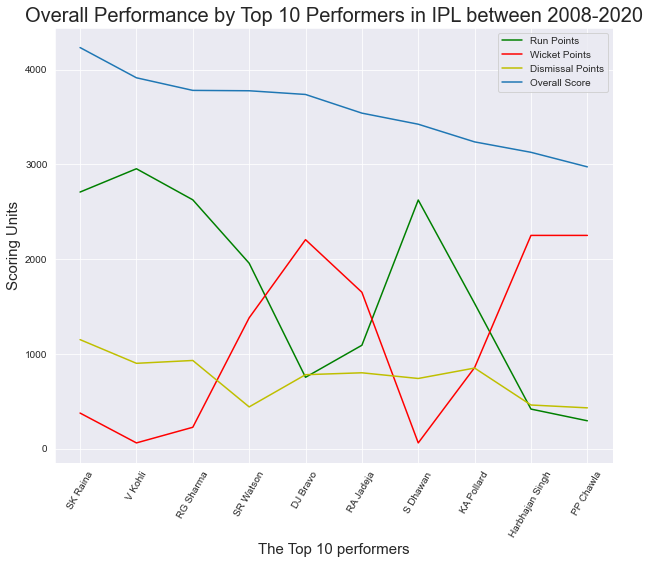

In [48]:
batting_points=0.5
bowling_points=15.0
fielding_points=10.0
all_rounding_1=pd.merge(batting_sorted,bowling_top,left_on='batsman',right_on='bowler',how='inner')
all_rounding_2=pd.merge(all_rounding_1,fielder_list_max,left_on='batsman',right_on='fielder',how='left')
all_rounding_performance=all_rounding_2.groupby(['batsman','Runs','Wickets','Dismissals']).apply(lambda x:(((x['Runs'])*batting_points)+((x['Wickets'])*bowling_points)+((x['Dismissals'])*fielding_points))).reset_index(name='Overall Score')
best_all_round_performance=all_rounding_performance.sort_values(by='Overall Score',ascending=False)
best_overall=best_all_round_performance.loc[:,['batsman','Runs','Wickets','Dismissals','Overall Score']][0:10]
print('The top 10 best players overall are:\n',best_overall)
plt.figure(figsize=(10,8))
plt.plot(best_overall['batsman'],best_overall['Runs']*batting_points,'g')
plt.plot(best_overall['batsman'],best_overall['Wickets']*bowling_points,'r')
plt.plot(best_overall['batsman'],best_overall['Dismissals']*fielding_points,'y')
plt.plot(best_overall['batsman'],best_overall['Overall Score'])
plt.xlabel('The Top 10 performers',size=15)
plt.ylabel('Scoring Units',size=15)
plt.xticks(rotation=60)
plt.title('Overall Performance by Top 10 Performers in IPL between 2008-2020',size=20)
plt.legend(['Run Points','Wicket Points','Dismissal Points','Overall Score'])

**Observation**: Suresh Raina is the only Batsman in IPL who has scored 350+ runs in each of the IPL season he has played. No wonder he holds the record for the player with highest runs.     

![](https://raw.githubusercontent.com/sayed-sajjad/IPL/main/assets/images/Suresh_Raina.jpg)

**In Picture**: Suresh Raina records in every IPL.   

<a name = Section9></a>
# **9. Summarization**

<a name = Section91></a>
### **9.1 Conclusion**

#### **Team Statistics**

a) CSK has one of the highest win percents in the IPL games winning about 61% of its games followed by Mumbai Indians. All the teams have a better chasing record than batting first record (chasing team wins 55.7% matches).This difference is most prominent in Kolkata Knight Riders who have a win percent of 61% chasing but only 41% batting first.

b) About 24% of the games that were won by the batting first team, the winning margin was less than 10 runs. However, 38% of the games won by the winning team were won in the 20th over, showing how close the matches have been.

#### **Batsman Statistics** 

a) Virat Kohli and Suresh Raina are among the highest run scorers in IPL with each scoring more than 5400 runs. However, Chris Gayle also has one of the highest number of runs scored in boundaries with a whooping 76% runs being scored in 4s and 6s.

b) Suresh Raina, Rohit Sharma and David Warner have scored the most number of runs in winning causes. In fact, whenever Raina scored more than 50 runs, 66% of the times his team ended up winning the match (it is 81% for Shane Watson and 74% for MS Dhoni).


#### **Bowler Statistics**

a) Lasith Malinga and Amit Mishra are one of the highest wicket takers in IPL. 43% of the wickets taken by Malinga have been either bowled or LBW. Bhuvaneshwar Kumar has one of the highest dot ball percents (41%) among the leading wicket takers.

<a name = Section92></a>
### **9.2 Actionable Insights**

- The Tournament has shown a slight favourism towards the winning Teams. What I mean to say is Stadiums like Chinnaswamy, Eden Gardens, Wankhede etc have hosted huge number of games. Now obviously this factor adds an edge to the home teams for these stadiums- and indeed they have been the most succesful teams in the history of the Tournament- Chennia Super Kings, Kolkata Knight Riders, Mumbai Indians etc. Although this is not the prime factor, yet has a weightage.
- Since Each Team gets an opportunity to Play atleast 7 matches in their Home Ground, most teams have also won the highest number of their wins in their Home Grounds. But Teams like Mumbai Indians and Chennai Super Kings have performed really well at away grounds too. This constitutes one of the major reasons, as to why these teams have been the most succesful in the IPL History.

- The Batting and Bowling Averages of most of teams are better in the First innings-as compared to the second innings.

- The datasource was very stable and clean. Data cleaning activities were not very difficult and overall it helped a lot in the analysis.
- The data was very rich- Ball by Ball data has been provided across all seasons- which is actually a very difficult task to manage.

![](https://raw.githubusercontent.com/sayed-sajjad/IPL/main/assets/images/ThankYou.jpg)